In [261]:
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F   


from matplotlib import pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### import data

In [262]:
default_data_path = 'data'

trainingset_df = pd.read_csv(default_data_path + '/training_set.csv')
trainingset_df.head()

testset_df = pd.read_csv(default_data_path + '/test_set.csv')
testset_df.tail()

,pid,filename,label
20,21,Pentagon (5).csv,Pentagon
21,22,Rectangle (4).csv,Rectangle
22,23,Rectangle (5).csv,Rectangle
23,24,Triangle (4).csv,Triangle
24,25,Triangle (5).csv,Triangle


In [263]:
# TODO: switch to numerical representation of label
from sklearn import preprocessing
label = ['Circle',
         'Heart',
         'Pentagon',
         'Rectangle',
         'Triangle',
         ]
label_encoder = preprocessing.LabelEncoder()
trainingset_df['label'] = label_encoder.fit_transform(trainingset_df['label'].values.ravel())
trainingset_df.tail()


,pid,filename,label
360,361,Pentagon (81).csv,2
361,362,Pentagon (82).csv,2
362,363,Pentagon (83).csv,2
363,364,Pentagon (84).csv,2
364,365,Pentagon (85).csv,2


In [264]:
testset_df['label'] = label_encoder.fit_transform(testset_df['label'].values.ravel())
testset_df.tail()

,pid,filename,label
20,21,Pentagon (5).csv,2
21,22,Rectangle (4).csv,3
22,23,Rectangle (5).csv,3
23,24,Triangle (4).csv,4
24,25,Triangle (5).csv,4


In [265]:
# check training data
for row in range(0, len(trainingset_df)):
    if(row%40 == 0):
        print(default_data_path + '/training_data/' + trainingset_df['filename'].iloc[row], trainingset_df['label']. iloc[row])

data/training_data/Circle (1).csv 0
data/training_data/Heart (16).csv 1
data/training_data/Rectangle (6).csv 3
data/training_data/Triangle (21).csv 4
data/training_data/Pentagon (26).csv 2
data/training_data/Circle (61).csv 0
data/training_data/Heart (66).csv 1
data/training_data/Rectangle (36).csv 3
data/training_data/Triangle (41).csv 4
data/training_data/Pentagon (81).csv 2


In [266]:
sample_train_data = pd.read_csv(default_data_path + '/training_data/' + trainingset_df['filename'].iloc[1])
sample_train_data.head()

,Time,92W,92X,92Y,92Z
0,0.025,2099,2149,1779,13
1,0.097,2103,2147,1804,13
2,0.133,2118,2139,1797,13
3,0.134,2129,2156,1760,13
4,0.211,2114,2150,1741,13


In [267]:
# pandas training X values to numpy
pd.read_csv(default_data_path + '/test_data/' + trainingset_df['filename'].iloc[1])['92W'][0:150].to_numpy()

array([2129, 2127, 2119, 2123, 2105, 2129, 2149, 2159, 2184, 2165, 2147,
       2175, 2202, 2205, 2231, 2231, 2216, 2205, 2200, 2188, 2173, 2148,
       2085, 2113, 2114, 2063, 2072, 2063, 2038, 2020, 2035, 2056, 2063,
       2038, 2056, 2050, 2003, 1991, 2038, 1980, 1933, 2022, 2108, 1961,
       1945, 2016, 1980, 1952, 1960, 1984, 1982, 2011, 1903, 1844, 1876,
       1918, 1983, 1978, 1920, 1790, 1946, 2074, 2061, 1995, 1966, 1987,
       1996, 2123, 2085, 2021, 2000, 2059, 2073, 2057, 2040, 2049, 2136,
       2067, 2042, 2106, 2128, 2034, 2053, 1983, 1991, 2058, 2073, 2074,
       2009, 2024, 2077, 2076, 2064, 2077, 2111, 2123, 2079, 2122, 2142,
       2138, 2152, 2152, 2182, 2168, 2164, 2167, 2181, 2187, 2191, 2176,
       2162, 2157, 2099, 2130, 2177, 2176, 2207, 2187, 2151, 2180, 2196,
       2203, 2187, 2155, 2138, 2148, 2173, 2190, 2176, 2174, 2146, 2168,
       2175, 2164, 2144, 2143, 2147, 2135, 2222, 2128, 2129, 2129, 2127,
       2115, 2128, 2112, 2157, 2226, 2138, 2141], d

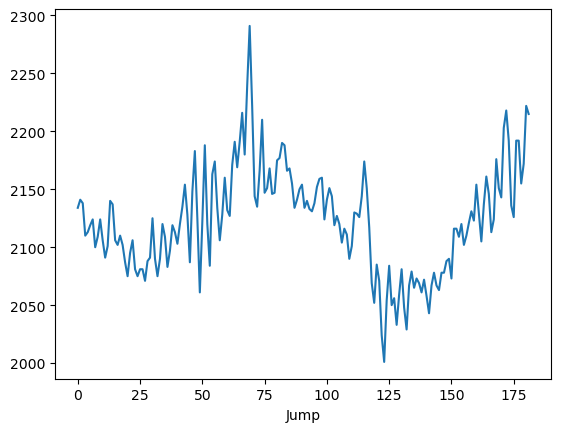

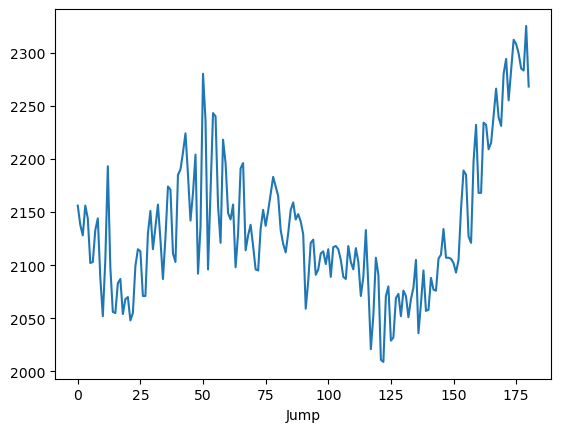

In [268]:
csv = pd.read_csv("data/training_data/Circle (1).csv")
PARx = csv.loc[:, '92W']
A = list(range(len(PARx)))  # 'W' 열의 데이터 개수에 맞게 범위 설정

plt.plot(A, PARx)
plt.xlabel("Jump")
plt.show()

csv = pd.read_csv("data/training_data/Circle (5).csv")
PARx = csv.loc[:, '92W']
A = list(range(len(PARx)))  # 'W' 열의 데이터 개수에 맞게 범위 설정

plt.plot(A, PARx)
plt.xlabel("Jump")
plt.show()


In [269]:
y = trainingset_df['label']
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

### model

In [270]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(150, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 5)

    def forward(self, x):
        x = x.view(-1, 150)  # 배치 크기를 유지하면서 Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# create model
model = Net().to(device)
print(model)

Net(
  (fc1): Linear(in_features=150, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=5, bias=True)
)


### hyperparameters

In [271]:
learning_rate = 0.001
training_epochs = 20
batch_size = 1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

### dataset and dataloader

In [272]:
def file_load(option):
    data_path_list = []
    if option == 'training_data':
        for row in range(0, len(trainingset_df)):
            data_path_list.append(default_data_path + '/' + option + '/' + 
                                  trainingset_df['filename'].iloc[row])
    if option == 'test_data':
        for row in range(0, len(testset_df)):
            data_path_list.append(default_data_path + '/' + option + '/' + 
                                  testset_df['filename'].iloc[row])
    return data_path_list

class CustomDataset(Dataset):
    def __init__(self, option):
        super(CustomDataset, self).__init__()
        self.file_list = file_load(option)
        if option == 'training_data':
            y = trainingset_df['label']
        if option == 'test_data':
            y = testset_df['label']
        self.y = y.values

    def __getitem__(self, index):
        x = pd.read_csv(self.file_list[index])['92W'][:150].to_numpy()
        x_data = torch.from_numpy(x).float()
        max_val = torch.max(x_data)
        min_val = torch.min(x_data)
        normalized_x_data = (x_data - min_val) * 2 / (max_val - min_val) - 1

        y_data = torch.from_numpy(np.array(self.y[index])).long()
        return normalized_x_data, y_data

    def __len__(self):
        return len(self.y)

In [273]:
'''
Main parameters for Dataloader
shuffle:
drop_last: if the last batch does not have enough number, throws it away
num_workers: how many CPU to use (default is 0)
collate_fn: function that creates batch
'''
train_dataset = CustomDataset(option='training_data')
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

test_dataset = CustomDataset(option='test_data')
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, num_workers=0)


In [274]:
train_input, train_label = next(iter(train_dataloader))
print(train_input.size())
print(train_label.size())

test_input, test_label = next(iter(test_dataloader))
print(test_input.size())
print(test_label.size())

total_batch = len(train_dataloader)
print('\nTotal number of training batches : {}'.format(total_batch))
total_batch = len(test_dataloader)
print('Total number of test batches : {}'.format(total_batch))

torch.Size([1, 150])
torch.Size([1])
torch.Size([1, 150])
torch.Size([1])

Total number of training batches : 365
Total number of test batches : 25


### training and testing

In [ ]:
for epoch in range(training_epochs):
    num_correct = 0
    num_samples = 0
    for batch_idx, (x, y) in enumerate(train_dataloader): 
        x = x.to(device)
        y = y.to(device)
        
        # forward 
        prediction = model(x)
        loss = criterion(prediction, y)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent 
        optimizer.step()   
        num_correct += (prediction == y).sum()
        num_samples += prediction.size(0)
    
    print(f'{num_correct}/{num_samples})

    

In [ ]:
def check_accuracy(loader, is_train, model):
    if is_train:
        print("checking accuracy on training data")
    else:
        print("checking accuracy on test data")
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples)*100:.2f}')

In [ ]:
check_accuracy(loader=train_dataloader, is_train=True, model=model)
check_accuracy(loader=test_dataloader, is_train=False, model=model)